In [41]:
import pickle
import pandas as pd

with open('spotify_dataset_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [42]:
data

,acousticness,valence,loudness,mode,key,speechiness,energy,instrumentalness,danceability,id,tempo,liveness,name,artist
0,0.806000,0.6010,-16.089,1,2,0.0324,0.19800,0.000000,0.507,5mnvqisoDJilY0uCEdT8rG,141.261,0.1020,Danny's Song,Loggins & Messina
1,0.021400,0.5050,-8.080,1,5,0.0296,0.67300,0.000444,0.542,5sY2beqWPiCRmTyjEkRPPZ,88.039,0.2810,To Find A Friend,Tom Petty
2,0.045700,0.9780,-4.906,1,9,0.0320,0.96000,0.000000,0.574,2Y90nL1ohB4sgYELDs7uNx,117.486,0.1210,Glory Days,Bruce Springsteen
3,0.225000,0.5020,-10.997,1,9,0.0528,0.51900,0.000004,0.630,0sDqo9UPzPUtu9wEkI3zRB,143.942,0.0974,The Weight - Remastered,The Band
4,0.002980,0.4910,-10.961,1,9,0.0378,0.76000,0.029400,0.380,24NwBd5vZ2CK8VOQVnqdxr,99.437,0.1040,Sweet Emotion,Aerosmith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112622,0.006510,0.0576,-24.567,1,1,0.4960,0.24500,0.000116,0.647,6KECEaBJjz7sz6One95awg,91.101,0.3240,Lipgloss Application Pt. 1,Slight Sounds ASMR
112623,0.000684,0.0739,-29.725,1,1,0.1730,0.01010,0.169000,0.601,1WKMPkedR3z44hL8QifjOT,137.771,0.3090,Anticipatory Ear to Ear Whispers Pt.1,Slight Sounds ASMR
112624,0.002830,0.0893,-32.141,1,1,0.1380,0.00416,0.087700,0.560,1ojOiN5E7NArWPkSqzojwT,103.896,0.1310,Anticipatory Ear to Ear Whispers Pt.2,Slight Sounds ASMR
112625,0.197000,0.0367,-38.382,0,10,0.0969,0.13100,0.000734,0.506,01Zuq3xB12zBwqfbPT55r8,79.787,0.2220,Making Your Eyes Heavy,fastASMR


In [43]:
data_reordered = data[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]

In [45]:
#track we're searching for
with open('new_searched_track1.pkl', 'rb') as f:
    searched = pickle.load(f)

# cols = searched.columns.tolist()
# cols = cols[-3:] + cols[:11]
# cols
# searched1 = searched[cols]
# searched1
searched_track = searched[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]
searched_track

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,7eOkHIcaoUhngxxypM5Ajr,Look At Her Now,Selena Gomez,0.564,0.753,0.114,0.0273,0,0.359,10,77.342,0.55,-7.908,0.252


In [46]:
#pca example 2
correlation = data_reordered.corr()
correlation.style.background_gradient(cmap='coolwarm')


,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
energy,1.000000,0.311106,-0.791947,-0.447718,-0.067689,0.228919,0.039333,0.250418,0.424055,0.803880,0.138610
danceability,0.311106,1.000000,-0.330823,-0.340426,-0.080429,-0.073679,0.026816,0.007112,0.547238,0.443800,0.197797
acousticness,-0.791947,-0.330823,1.000000,0.419751,0.065747,-0.167539,-0.033514,-0.211367,-0.307314,-0.678517,-0.136080
instrumentalness,-0.447718,-0.340426,0.419751,1.000000,-0.021086,-0.084887,-0.023469,-0.140500,-0.383642,-0.627077,-0.125773
mode,-0.067689,-0.080429,0.065747,-0.021086,1.000000,-0.013341,-0.143667,0.004327,-0.017941,-0.038071,-0.088691
liveness,0.228919,-0.073679,-0.167539,-0.084887,-0.013341,1.000000,0.002180,0.037933,0.021407,0.135344,0.088395
key,0.039333,0.026816,-0.033514,-0.023469,-0.143667,0.002180,1.000000,0.001123,0.030481,0.033246,0.018973
tempo,0.250418,0.007112,-0.211367,-0.140500,0.004327,0.037933,0.001123,1.000000,0.126131,0.235523,0.074261
valence,0.424055,0.547238,-0.307314,-0.383642,-0.017941,0.021407,0.030481,0.126131,1.000000,0.417432,0.093272
loudness,0.803880,0.443800,-0.678517,-0.627077,-0.038071,0.135344,0.033246,0.235523,0.417432,1.000000,0.117156


In [60]:
features = data_reordered.loc[:, 'energy':'speechiness']
cols_to_standardize = features.columns.tolist()

In [61]:
from sklearn.preprocessing import StandardScaler
std_audio = StandardScaler().fit_transform(data_reordered[cols_to_standardize]) # normalizing the data

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(std_audio)

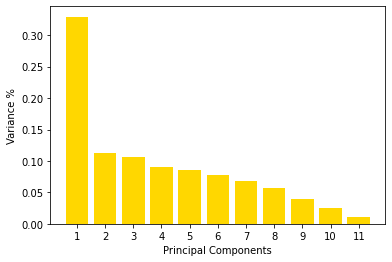

In [63]:
# Plotting the variances for each PC
import matplotlib.pyplot as plt

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

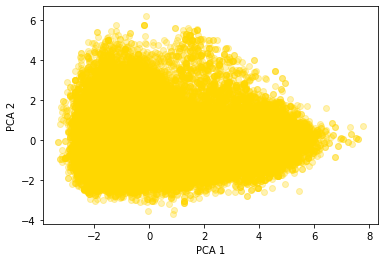

In [64]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

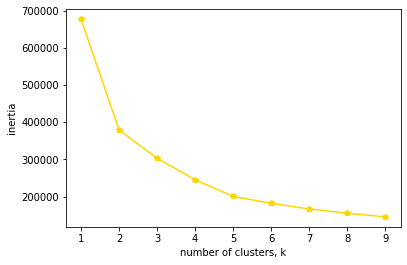

In [65]:
from sklearn.cluster import KMeans

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(k)
plt.show()

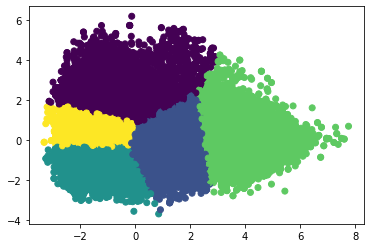

In [66]:
model = KMeans(n_clusters=5)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [67]:
#getting the labels in the new PCA Kmeans df
segm_kmeans = pd.concat([data_reordered.reset_index(drop=True)],axis=1)
#segm_kmeans.columns.values[-11:] = ["Component 1","Component 2","Component 3","Component 4","Component 5","Component 6","Component 7","Component 8","Component 9","Component 10","Component 11"]
segm_kmeans["Segment KMeans PCA"] = model.labels_
# segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5"})
segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5"})

segm_kmeans[:50]


,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness,Segment KMeans PCA,Segment
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina,0.198,0.507,0.806000,0.000000,1,0.1020,2,141.261,0.601,-16.089,0.0324,1,Cluster 2
1,5sY2beqWPiCRmTyjEkRPPZ,To Find A Friend,Tom Petty,0.673,0.542,0.021400,0.000444,1,0.2810,5,88.039,0.505,-8.080,0.0296,4,Cluster 5
2,2Y90nL1ohB4sgYELDs7uNx,Glory Days,Bruce Springsteen,0.960,0.574,0.045700,0.000000,1,0.1210,9,117.486,0.978,-4.906,0.0320,2,Cluster 3
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band,0.519,0.630,0.225000,0.000004,1,0.0974,9,143.942,0.502,-10.997,0.0528,4,Cluster 5
4,24NwBd5vZ2CK8VOQVnqdxr,Sweet Emotion,Aerosmith,0.760,0.380,0.002980,0.029400,1,0.1040,9,99.437,0.491,-10.961,0.0378,4,Cluster 5
5,30g3R8mv8qyLKv1A0cAFil,Brown Eyed Girl,Van Morrison,0.586,0.496,0.182000,0.000000,1,0.3320,7,148.882,0.899,-10.991,0.0353,4,Cluster 5
6,1Pd1h30mgU05QkWYhgFzwt,Turn to Stone,Electric Light Orchestra,0.720,0.548,0.068600,0.000232,0,0.1070,1,140.966,0.458,-9.777,0.0409,4,Cluster 5
7,6BD1X1PeV5UzYUdiVaD2yL,Show Me The Way,Peter Frampton,0.726,0.700,0.434000,0.000001,1,0.0963,2,130.109,0.641,-7.717,0.0329,2,Cluster 3
8,36gPq8WG7tDxrblyGVUCiT,Up Around The Bend,Creedence Clearwater Revival,0.850,0.589,0.060600,0.779000,1,0.2740,2,130.318,0.813,-6.143,0.0343,4,Cluster 5
9,43DeSV93pJPT4lCZaWZ6b1,The Boys Are Back In Town,Thin Lizzy,0.706,0.445,0.234000,0.000252,1,0.2050,8,80.823,0.768,-9.803,0.0461,4,Cluster 5


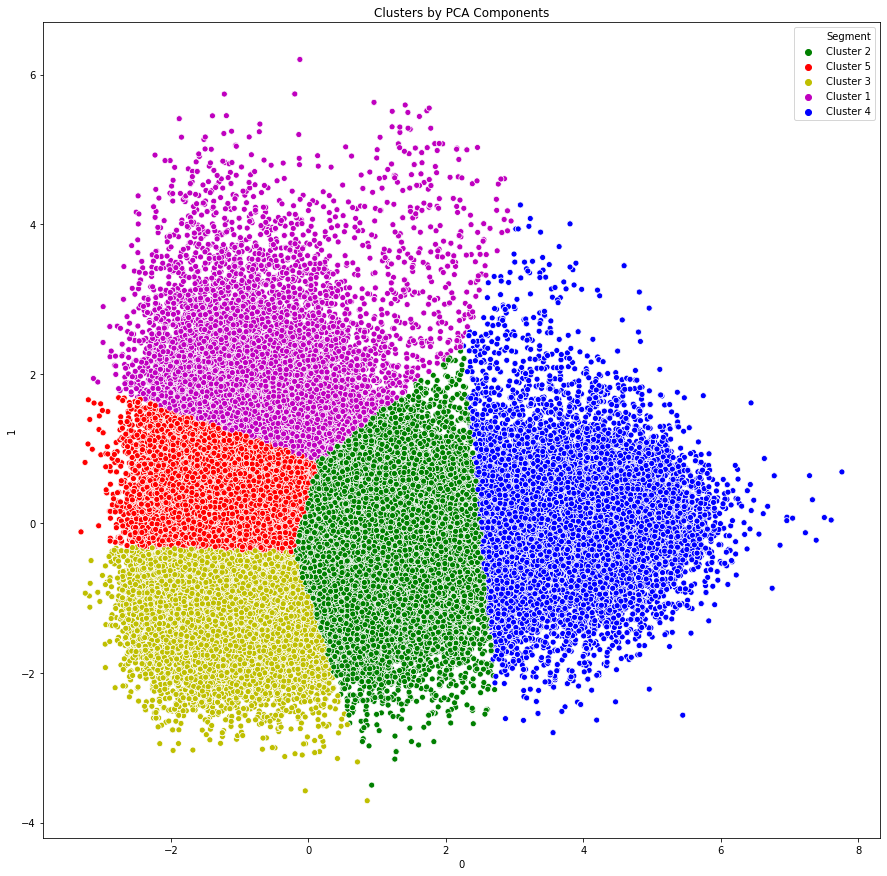

In [68]:
#visualization PCA Kmeans result
%matplotlib inline
import seaborn as sns

x_axis = PCA_components[0]
y_axis = PCA_components[1]
plt.figure(figsize=(15,15))
# sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r','b','y','m'])
sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r',"y",'m','b'])

plt.title("Clusters by PCA Components")
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler
std_audio = StandardScaler().fit_transform(searched_track[cols_to_standardize]) # normalizing the data
# pca = PCA(n_components=1)
principleComponents = pca.transform(std_audio)
PCA_components = pd.DataFrame(principleComponents)
print(model.predict(PCA_components.iloc[:,:2]))
principleComponents

[1]


array([[ 2.47045551e-16,  1.86774373e-18,  1.90072855e-16,
         2.14492936e-16,  4.50469889e-16, -9.81354577e-17,
        -2.32347707e-16,  1.21327741e-17,  3.76948839e-16,
         2.35466676e-16, -2.42383270e-17]])

In [70]:
x = segm_kmeans[segm_kmeans["Segment KMeans PCA"] == 1]
x.iloc[:, : 3]

,id,name,artist
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina
10,2TVxnKdb3tqe1nhQWwwZCO,Tiny Dancer,Elton John
15,26uHwSHlaK5mskSMhbRod3,Luckiest Man,The Wood Brothers
17,2sbF2F1fIKylqW79XFLbH8,I Got A Name,Jim Croce
19,2Jf0PGy9NzR1PTXvRFfaoE,Suite: Judy Blue Eyes,"Crosby, Stills & Nash"
...,...,...,...
112619,2X931x6cwjOAXsUlswU9iK,Male Inaudible Whispers,ASMR HeadHI
112621,5fNkMM1ID4ceO22WHKLf1F,First Day of Art Class Pt.2,Goodnight Moon ASMR
112622,6KECEaBJjz7sz6One95awg,Lipgloss Application Pt. 1,Slight Sounds ASMR
112623,1WKMPkedR3z44hL8QifjOT,Anticipatory Ear to Ear Whispers Pt.1,Slight Sounds ASMR
